<div dir="rtl">
    <h2>
       فاز سوم پروژه بازیابی اطلاعات - خوشه‌بندی
    </h2>
</div>
<p></p>
<div dir="rtl">
اعضای گروه: حمیدرضا هدایتی، حامد علی‌محمدزاده، آرمین سعادت‌بروجنی
<p></p>
</div>

<div dir="rtl">
    <h3>
       نصب نیازمندی‌های پروژه:
    </h3>
</div>

In [1]:
%cd ../../
%ls

In [2]:
!pip install -r requirements.txt
!pip install yellowbrick

<div dir="rtl">
    <h3>
        ایمپورت کردن پکیج‌های مورد نیاز:
    </h3>
</div>

In [3]:
from main import JSON_to_clustering_arrays 
from yellowbrick.cluster import intercluster_distance, kelbow_visualizer
from clusterings import k_means, gmm, hierarchical
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/rmool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rmool/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div dir="rtl">
    <h3>
       تحلیل اطلاعات فایل جیسون و ایجاد w2v و tf_idf:
    </h3>
<p></p>    
لینک‌ها خوانده و ذخیره می‌شود. تگ‌های اصلی با شماره ۰ تا ۱۳ ذخیره می‌شود.
<p></p>
summery و title با هم ترکیب شده و به فضایTF_IDF و Word2Vec برده می‌شود.
<p></p>
    برای TF_IDF در گام اول بعد فضا برابر تعداد term ها در نظر گرفته می‌شود. در گام بعد با استفاده از PCA کاهش ابعاد صورت می‌گیرد چرا که فاصله در ابعاد بالا مبنای خوبی برای الگوریتم k_means نیست.
<p></p>
    تبدیل Word2Vec توسط کتابخانه موجود با پارامترهای پیش‌فرض انجام می‌شود. تنها پارامتری که باید تعیین شود ابعاد فضا است که عددی زیر ۱۰۰ در نظر گفته می‌شود.
</div>

In [4]:
tf_idf, w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json")

In [5]:
features_dim = 50
random_state = 12
tf_idf = PCA(features_dim, random_state=random_state).fit_transform(tf_idf)

<div dir="rtl">
    <h2>
        بررسی پارامترهای k_means:
    </h2>
    <p></p>
    KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10, max_iter=300)
    <p></p>
    random_state یک عدد دلخواه تعیین می‌شود تا با ثابت ماندن بقیه پارامترها جواب یکسان گرفته شود.
    <p></p>
    در گام اول تعداد خوشه‌ها (n_clusters) تعیین می‌شود.
</div>

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها بدون استفاده از tags:
    </h4>
    <p></p>
    نمودار تابع هزینه (مجموع مجذور فاصله هر نقطه از مرکز) بر حسب تعداد خوشه‌ها رسم می‌شود.
</div>

In [6]:
# inertia_tfidf = []
# for i in range(2, 20):
#     inertia_tfidf.append(k_means.get_cost(tf_idf, random_state=random_state, n_clusters=i))
# print('TF-IDF:')
# ax = sns.lineplot(x=range(2, 20), y=inertia_tfidf);
# ax.set(xlabel='n_clusters', ylabel='inertia')
# plt.show()

# inertia_w2v = []
# for i in range(2, 20):
#     inertia_w2v.append(k_means.get_cost(w2v, random_state=random_state, n_clusters=i))
# print('W2v:')
# ax = sns.lineplot(x=range(2, 20), y=inertia_w2v);
# ax.set(xlabel='n_clusters', ylabel='inertia')
# plt.show()

<div dir="rtl">
    همانطور که انتظار میرفت با افزایش تعداد خوشه‌ها، هزینه کمتر شد. اما به دنبال نقطه‌ای هستیم که کاهش معناداری داشته باشد که از نمودارهای بالا به دست نیامد.
<p></p>
    برای دقت بیشتر و در نظر گرفتن زمان مورد نیاز برای رسیدن به جواب، میتوان از  Elbow method استفاده کرد.
</div>

In [7]:
# print('TF_IDF:')
# _ = kelbow_visualizer(KMeans(random_state=random_state), tf_idf, k=(2,16), metric='silhouette');
# print('Word2Vec:')
# _ = kelbow_visualizer(KMeans(random_state=random_state), w2v, k=(2,16), metric='silhouette');

<div dir="rtl">
    بنابراین تعداد خوشه‌ها در هر دو روش ۵ به دست آمد.
<p></p>
    با مقدار پیش‌فرض پارامترهای KMeans خوشه‌بندی را انجام داده و نتایج ارزیابی را نمایش می‌دهیم. 
</div>

In [8]:
# k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 5, 5)

<div dir="rtl">
    برای افزایش کیفیت خوشه‌بندی، میتوان تعداد ابعاد را کمی بیشتر کرد.
    <p></p>
    در مورد w2v، با افزایش بعد مقدار epoches نیز از ۱۰ به ۳۲ افزایش یافت تا ویژگی‌های جدید بهتر آموخته شوند.
    <p></p>
    مشابه این فرایند برای tf_idf نیز اعمال شد. فضا از ۵۰ به ۴۰۰ تغییر یافت و برای رسیدن به نتیجه مطلوب تعداد حالات بیشتری (با randomness بیشتر ) بررسی شد.
</div>

In [9]:
enhanced_tfidf, enhanced_w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json", tf_idf_features=1000, w2v_min_count=2, w2v_epochs=32, w2v_vector_size=128)

In [10]:
features_dim = 400
enhanced_tfidf = PCA(features_dim, random_state=random_state).fit_transform(enhanced_tfidf)

In [11]:
# results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(enhanced_tfidf, enhanced_w2v, tags, 5, 5)
# results

<div dir="rtl">
    همانطور که مشاهده می‌شود نتایج به شکل معناداری بهبود یافت. دلیل اصلی این بهبود افزایش بعد نیست بلکه اجرای الگوریتم با نقاط شروع متفاوت و با random_state های متفاوت است که باعث می‌شود نقاط بهینه محلی بیشتری را بررسی کرده و بهترین آن‌ها را به عنوان بهینه اصلی انتخاب کند.
    <p></p><p></p>
    در زیر خوشه‌ها بر اساس رنگ مشخص شده‌اند. این نمایش بر حسب ۲ ویژگی بارز شناسایی شده توسط PCA است.
</div>

In [12]:
# k_means.PCA2_plot(enhanced_tfidf, 5, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
# k_means.PCA2_plot(enhanced_w2v, 5, best_random_w2v, tags, "PCA Reduction of Word2Vec")

<div dir="rtl">
    موقعیت خوشه‌ها نسبت به هم با معیار فاصله بین خوشه‌ای به شکل زیر است:
</div>

In [13]:
# print('TF_IDF:')
# _ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_tfidf), enhanced_tfidf)
# print('Word2Vec:')
# _ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_w2v), enhanced_w2v)

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها با استفاده از tags:
    </h4>
    <p></p>
    دسته‌های اصلی به عنوان ground truth استفاده می‌شوند. تعداد این دسته‌ها ۱۴ تاست پس تعداد خوشه‌ها برابر ۱۴ هم امتحان می‌کنیم.
</div>

In [14]:
# k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 14, 14)

<div dir="rtl">
    <h4>
        نتایج برگزیده k_means:
    </h4>
</div>

In [15]:
# kmeans_results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(tf_idf, enhanced_w2v, tags, 14, 14)
# kmeans_results

<div dir="rtl">
    مشاهده می‌شود که عملکرد خوشه‌بندی با ۱۴ خوشه بهبود می‌یابد.
</div>

In [16]:
# k_means.PCA2_plot(tf_idf, 14, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
# k_means.PCA2_plot(enhanced_w2v, 14, best_random_w2v, tags, "PCA Reduction of Word2Vec")

In [17]:
# print('TF_IDF:')
# _ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_tfidf), tf_idf)
# print('Word2Vec:')
# _ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_w2v), enhanced_w2v)

<div dir="rtl">
    همانطور که از نمودار بالا برداشت می‌شود، روش w2v خیلی بهتر خوشه‌ها را از هم تفکیک کرده است.
</div>

<div dir="rtl">
    <h4>
        بررسی سایر پارامترها: n_init و max_iter
    </h4>
    <p></p>
    تا اینجا این مقادیر به صورت پیش‌فرض به ترتیب ۱۰ و ۳۰۰ بوده‌اند.
    <p></p>
    n_init تعداد بارهایی است که به ازای هر بار صدا زدن تابع KMeans الگوریتم انجام شده و بهترین جواب بازگردانده می‌شود.
    <p></p>
    max_iter حداکثر تعداد مراحلی است که در هر بار اجرای الگوریتم طی می‌شود.
    <p></p>
    <h5>
        بررسی n_init:
    </h5>
</div>

In [18]:
# k_means.evaluate_n_init(tf_idf, enhanced_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [1, 5, 10, 20, 30])    

<div dir="rtl">
    از آنجا که در کد با چندین random_state حالات مختلف بررسی شده و بهترین آن‌ها انتخاب می‌شود، به نوعی همان کار n_init دارد دستی انجام می‌شود و دیگر تاثیر چندانی ندارد. به جز در یک مورد که برای w2v با n_init=1 مقدار غیر بهینه به دست آمده است که آن هم با تکرار مجدد برطرف می‌شود.
    نتیجه اینکه n_init بیشتر از حدودا ۵ صرفا بار محاسبات را افزایش می‌دهد و تاثیر مثبتی ندارد.
    <p></p>
    <h5>
        بررسی max_iter:
    </h5>
</div>

In [19]:
# k_means.evaluate_max_iter(tf_idf, enhanced_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [10, 50, 100, 300, 500])    

<div dir="rtl">
    برای مقادیر ۱۰ و ۵۰ که کمتر از حالت پیش‌فرض هستند مقادیر غیر بهینه به دست آمد. اما برای مقادیر بیشتر از ۱۰۰ الگوریتم قبل از رسیدن به max_iter همگرا شده است. در کل چون در این مسئله خیلی زود همگرایی اتفاق رخ می‌دهد max_iter چندان تاثیری ندارد.
    <p></p>
</div>

<div dir="rtl">
    <h2>
        بررسی پارامترهای gmm:
    </h2>
    <p></p>
    GMM دارای ۲ هایپرپارامتر مهم است: n_components, covariance_type
    <p></p>
    در k_means تعداد خوشه‌ها به صورت تجربی ۵ به دست آمد. از طرفی میدانیم ۱۴ دسته اصلی داریم. پس مقدار n_compenents را بین مقادیر ۵ تا ۱۵ بررسی میکنیم.
    <p></p>
    covariance_type چهار حالت دارد که هر ۴ مورد را بررسی میکنیم: full, tied, diag, spherical
    <p></p>
    این فرآیند برای هر دو حالت enhanced_tfidf و tf_idf انجام می‌شود تا تاثیر بعد فضا هم بررسی شود.
    <p></p>
    این کارها به ازای tf_idf و w2v انجام می‌شود.
    <p></p>
    بنابراین ۲ * ۲ * ۴ * ۱۱ یعنی ۱۷۶ حالت باید بررسی شود.
</div>

In [20]:
# AMI_results = gmm.get_result_df(tf_idf, w2v, tags)
# AMI_results_higher_dim = gmm.get_result_df(enhanced_tfidf, enhanced_w2v, tags)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0


In [21]:
# AMI_results.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
160,tf_idf,15,full,100,0.202012,AMI
168,tf_idf,15,diag,100,0.201368,AMI
164,tf_idf,15,tied,100,0.191672,AMI
144,tf_idf,14,full,100,0.191462,AMI
152,tf_idf,14,diag,100,0.180371,AMI
104,tf_idf,11,diag,100,0.179771,AMI
148,tf_idf,14,tied,100,0.179561,AMI
128,tf_idf,13,full,100,0.179148,AMI
112,tf_idf,12,full,100,0.178279,AMI
132,tf_idf,13,tied,100,0.177029,AMI


In [22]:
# AMI_results.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
196,w2v,6,tied,100,0.050244,AMI
176,w2v,5,full,100,0.047989,AMI
180,w2v,5,tied,100,0.046318,AMI
228,w2v,8,tied,100,0.045091,AMI
216,w2v,7,diag,100,0.045002,AMI
220,w2v,7,spherical,100,0.044726,AMI
208,w2v,7,full,100,0.044576,AMI
200,w2v,6,diag,100,0.044015,AMI
204,w2v,6,spherical,100,0.043736,AMI
192,w2v,6,full,100,0.042630,AMI


In [23]:
# AMI_results_higher_dim.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
28,tf_idf,6,spherical,100,0.202789,AMI
44,tf_idf,7,spherical,100,0.169626,AMI
108,tf_idf,11,spherical,100,0.164591,AMI
140,tf_idf,13,spherical,100,0.164064,AMI
60,tf_idf,8,spherical,100,0.154832,AMI
124,tf_idf,12,spherical,100,0.154315,AMI
156,tf_idf,14,spherical,100,0.148663,AMI
92,tf_idf,10,spherical,100,0.144098,AMI
172,tf_idf,15,spherical,100,0.135655,AMI
160,tf_idf,15,full,100,0.135464,AMI


In [24]:
# AMI_results_higher_dim.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)

,vector,n_components,covariance_type,max_iter,score,metric
196,w2v,6,tied,100,0.544751,AMI
200,w2v,6,diag,100,0.539074,AMI
212,w2v,7,tied,100,0.536347,AMI
216,w2v,7,diag,100,0.524181,AMI
204,w2v,6,spherical,100,0.520304,AMI
232,w2v,8,diag,100,0.514500,AMI
228,w2v,8,tied,100,0.511500,AMI
244,w2v,9,tied,100,0.508246,AMI
248,w2v,9,diag,100,0.504238,AMI
184,w2v,5,diag,100,0.502715,AMI


<div dir="rtl">
    بنابراین برای w2v حالت با فضای بعد بالاتر مناسب است اما برای tf_idf فضای با بعد کمتر بهتر عمل کرد.
    بنابراین w2v با بعد ۱۲۸ و tf_idf با بعد ۵۰ محاسبه خواهد شد.
    <p></p>
    <p></p>
    برای tf_idf با قطعیت حالت full بهتر عمل می‌کند. تعداد خوشه‌ها بین ۹ تا ۱۴ مناسب است و آنچنان فرقی ندارد. چون می‌دانیم ۱۴ دسته اصلی داریم همان ۱۴ را برای تعداد خوشه‌های tf_idf در نظر میگیریم.
    <p></p>
    برای حالت w2v هم diag مناسب به نظر می‌رسد هم full اما diag تصمیم محکم‌تر و به صرفه‌تری است چرا که تعداد پارامتر‌های کمتری دارد. تعداد خوشه‌ها بین ۱۰ تا ۱۳ معقول است. چون میدانیم تعداد دسته‌های اصلی ۱۴ تاست برای w2v تعداد خوشه ۱۳ را انتخاب می‌کنیم که نزدیک‌تر به ۱۴ باشد.
</div>

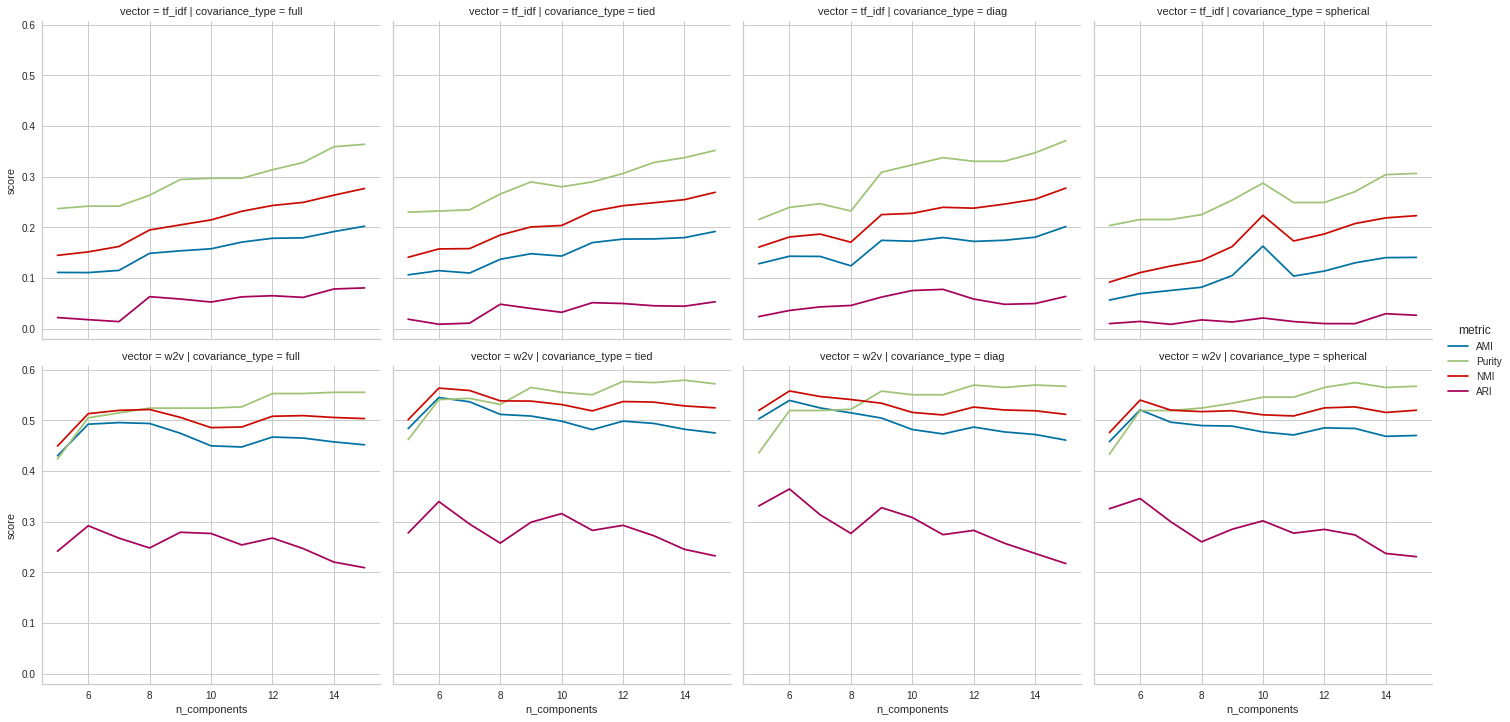

In [25]:
# AMI_res = pd.concat([AMI_results.query('vector == "tf_idf"'),AMI_results_higher_dim.query('vector == "w2v"')], axis=0, ignore_index=False)
# sns.relplot(data=AMI_res, x='n_components', y='score', row='vector', col='covariance_type', hue="metric", kind='line');

<div dir="rtl">
    <h4>
        بررسی max_iter برای tf_idf:
    </h4>
</div>

In [26]:
# max_iters = [50, 100, 200]
# for max_iter in max_iters:
#     print("max_iter: " + str(max_iter) + " --> AMI: " + str(gmm.get_AMI(tf_idf, tags, 14, 'full', max_iter)))

max_iter: 50 --> AMI: 0.191462
max_iter: 100 --> AMI: 0.191462
max_iter: 200 --> AMI: 0.191462


<div dir="rtl">
    <h4>
        بررسی max_iter برای w2v:
    </h4>
</div>

In [27]:
# max_iters = [50, 100, 200]
# for max_iter in max_iters:
#     print("max_iter: " + str(max_iter) + " --> AMI: " + str(gmm.get_AMI(enhanced_w2v, tags, 14, 'full', max_iter)))

max_iter: 50 --> AMI: 0.45722
max_iter: 100 --> AMI: 0.45722
max_iter: 200 --> AMI: 0.45722


<div dir="rtl">
        بنابراین max_iter تاثیر خاصی ندارد چون خیلی زود همگرا می‌شود و همان مقدار ۱۰۰ برایش مناسب است.
</div>

In [28]:
# tfidf_param = {'n_components': 14, 'covariance_type': 'full', 'max_iter': 100}
# w2v_param = {'n_components': 13, 'covariance_type': 'diag', 'max_iter': 100}

<div dir="rtl">
    <h4>
        نتایج برگزیده gmm:
    </h4>
</div>

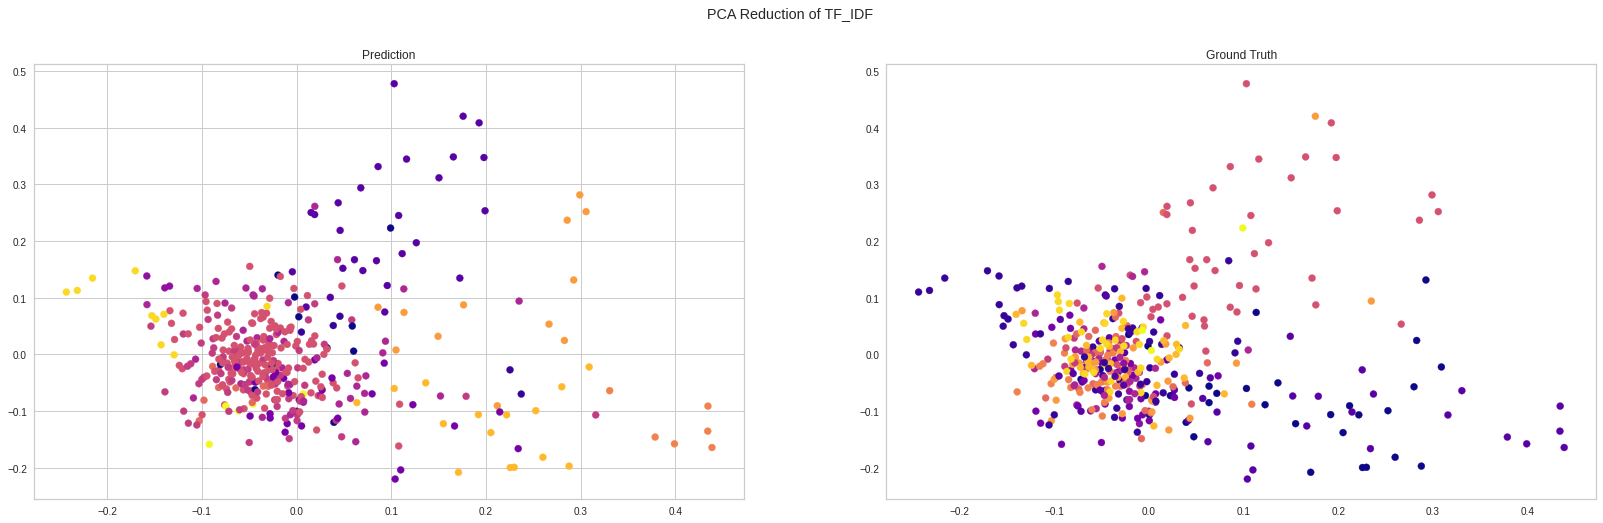

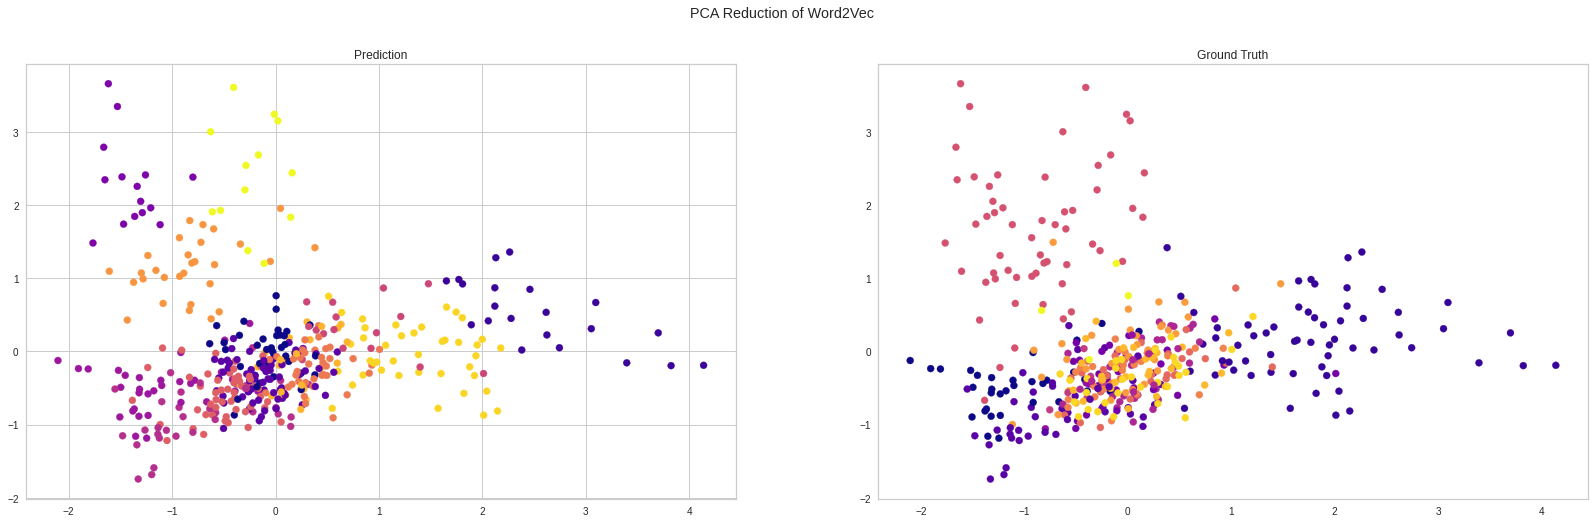

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index
tf_idf,0.344498,0.197955,0.270262,0.058894
w2v,0.612440,0.537625,0.575182,0.380436


In [29]:
# gmm_results = gmm.get_evaluation_dataframe(tf_idf, tfidf_param, enhanced_w2v, w2v_param, tags)
# gmm_results

<div dir="rtl">
    <h2>
        بررسی پارامترهای hierarchical:
    </h2>
    <p></p>
    از روش AgglomerativeClustering استفاده میکنیم.
    <p></p>
    دارای ۳ هایپرپارامتر مهم است: n_clusters, linkage, affinity
    <p></p>
    در k_means تعداد خوشه‌ها به صورت تجربی ۵ به دست آمد. از طرفی میدانیم ۱۴ دسته اصلی داریم. پس مقدار n_clusters را بین مقادیر ۵ تا ۱۵ بررسی میکنیم.
    <p></p>
    linkage چهار حالت دارد که هر ۴ مورد را بررسی میکنیم: ward, complete, average, single
    <p></p>
    affinity پنج حالت دارد: euclidean, l1, l2, manhattan, cosine.
    <p></p>
    این کارها به ازای tf_idf و w2v انجام می‌شود.
    <p></p>
    بنابراین ۲ * ۵ * ۴ * ۱۱ یعنی ۴۴۰ حالت باید بررسی شود.
</div>

In [ ]:
AMI_results_hier = hierarchical.get_result_df(tf_idf, enhanced_w2v, tags)
_ = AMI_results_hier.query('vector == "tf_idf" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)
_ = AMI_results_hier.query('vector == "w2v" and metric == "AMI"').sort_values(by=['score'], ascending=False).head(10)